# Visuals
pro každý hrací den se to zprůměruje

## Enviroment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Input

In [11]:
# Internal Input: Function to read the internal file and extract data
def read_excel_to_df(file_path):
    try:
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path, engine='openpyxl')
        
        # Check if the DataFrame has the correct number of columns and they are in the expected order
        expected_columns = ['code', 'date', 'event', 'city', 'venue', 'accom. Code', 'flight.Code', 'Standard Accommodation', 'Superior Accommodation', 'Luxurious Accommodation', 'Standard Price', 'Superior Price', 'Luxurious Price', 'Standard Rating', 'Superior Rating', 'Luxurious Rating', 'Min Price', 'Standard Price Total', 'Superior Price Total', 'Luxurious Price Total']
        if len(df.columns) != len(expected_columns) or not all(df.columns == expected_columns):
            # If columns do not match, raise an error
            raise ValueError("Error: Unexpected input form.")

        # Convert the 'date' column to datetime dtype
        df['date'] = pd.to_datetime(df['date'])

        # Return the DataFrame
        return df
    
    except ValueError as ve:
        print(ve)
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [12]:
file_path_accom = '/Users/danielavandasova/Library/CloudStorage/OneDrive-Personal/Documents/3_IES/8-Semestr/Data Analysis in Python/Python_Project/updated_accommodation_data0.xlsx'
accommodation_data = read_excel_to_df(file_path_accom)

In [13]:
print(accommodation_data)

         code       date                                         event  \
0   bundes001 2024-09-14                   RB Leipzig vs. Union Berlin   
1   bundes002 2024-09-14         Borussia Dortmund vs. Heidenheim 1846   
2   bundes003 2024-09-14            1899 Sinsheim vs. Bayer Leverkusen   
3   bundes004 2024-09-14                           Freiburg vs. Bochum   
4   bundes005 2024-09-14                        Augsburg vs. St. Pauli   
5   bundes006 2024-09-14             Wolfsburg vs. Eintracht Frankfurt   
6   bundes007 2024-09-14                    Mainz 05 vs. Werder Bremen   
7   bundes008 2024-09-14        Bor. Mönchengladbach vs. VfB Stuttgart   
8   bundes009 2024-09-14              Holstein Kiel vs. Bayern München   
9   bundes010 2024-09-21                Bayer Leverkusen vs. Wolfsburg   
10  bundes011 2024-09-21           VfB Stuttgart vs. Borussia Dortmund   
11  bundes012 2024-09-21  Eintracht Frankfurt vs. Bor. Mönchengladbach   
12  bundes013 2024-09-21              

pandas._libs.tslibs.timestamps.Timestamp

## Visuals
### Flight and Accommodation Pricing Trends 
The purpose of this graph is to show how much in advance is it best to book a stay to see a match. The graph contains price averages of each match day in our database.
standard, superior, luxurious

In [14]:
# Create a new DataFrame that contains only the 'date', 'Standard Price Total', 'Superior Price Total', and 'Luxurious Price Total' columns
accommodation_data = accommodation_data[['date', 'Standard Price Total', 'Superior Price Total', 'Luxurious Price Total']]
#print(accommodation_data)

         date  Standard Price Total  Superior Price Total  \
0  2024-09-14                  1619                   588   
1  2024-09-14                  1920                   682   
2  2024-09-14                   918                    69   
3  2024-09-14                  1075                   564   
4  2024-09-14                   934                   297   
5  2024-09-14                   865                   215   
6  2024-09-14                  1241                   633   
7  2024-09-14                   954                   588   
8  2024-09-14                  1154                   595   
9  2024-09-21                  1871                   516   
10 2024-09-21                  1692                   501   
11 2024-09-21                   662                   425   
12 2024-09-21                  1207                   556   
13 2024-09-21                  1313                   502   
14 2024-09-21                  1325                   515   
15 2024-09-21           

In [15]:
# Group the data by 'date' and calculate the mean price for each accommodation type
accommodation_data = accommodation_data.groupby('date').mean()
print(accommodation_data)

            Standard Price Total  Superior Price Total  Luxurious Price Total
date                                                                         
2024-09-14           1186.666667            470.111111             842.777778
2024-09-21           1273.000000            517.777778             631.555556
2024-09-28           1043.777778            499.888889             623.111111
2024-10-05           1102.111111            548.777778             705.000000
2024-10-19            830.800000            463.400000             596.600000


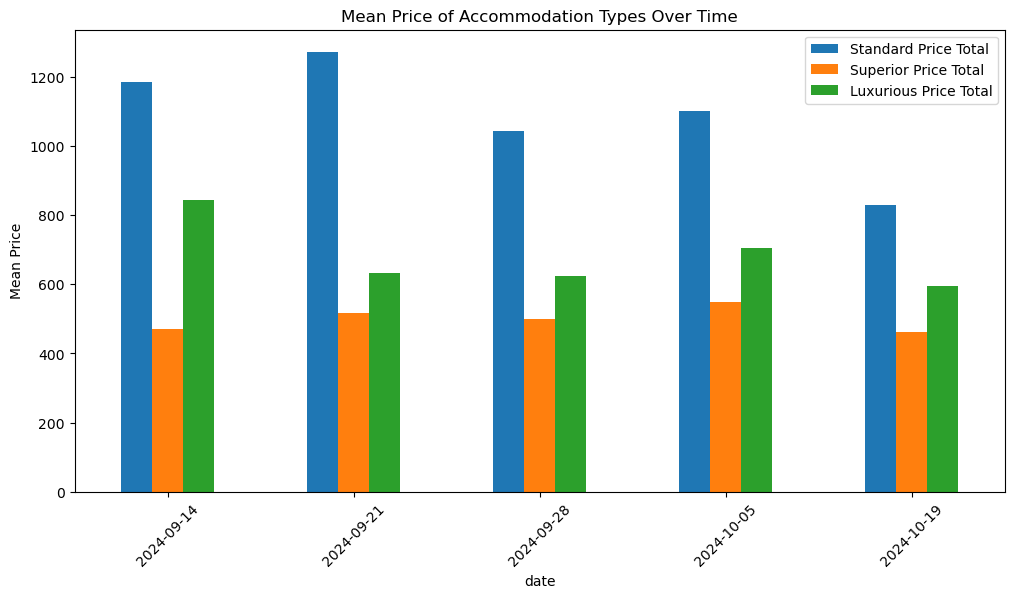

In [23]:
# Consider each date as series and accomodation type as category
# Plot a bar chart that has 3 columns for each date (accomodation type) and the height of the columns is the mean price
accommodation_data.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Price of Accommodation Types Over Time')
plt.ylabel('Mean Price')
# Instead of dates on the x-axis, show the dates as strings
plt.xticks(ticks=range(len(accommodation_data.index)), labels=[date.strftime('%Y-%m-%d') for date in accommodation_data.index], rotation=45)
plt.show()